<H1>Geração de Gráficos DOLLAR x IBOVESPA<h1>
<p>Neste trabalho, apresentamos a continuação da analise de dados do Dollar x IBOVESPA</p>


<h2>Passo1</h2>
<p>Carga dos dados importados, lembrando que a origem destes dados já foi apresentado na visão de Analise Dolar x IBOV</p>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importação dos Datasets
bolsa_valores = pd.read_csv('./../dados/IBOV.csv')
dollar = pd.read_csv('./../dados/USD_BRL.csv')

In [10]:
bolsa_valores.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,98283.0,98283.0,95820.0,96991.0,96991.0,9738000.0
1,2020-09-22,96995.0,97684.0,96390.0,97294.0,97294.0,7281300.0
2,2020-09-23,97294.0,97389.0,95728.0,95735.0,95735.0,8830700.0
3,2020-09-24,95735.0,97955.0,95653.0,97012.0,97012.0,9331000.0
4,2020-09-25,97011.0,97012.0,95632.0,96999.0,96999.0,7351100.0


In [11]:
display(bolsa_valores.describe()) #resumo dataframe bolsa

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,116177.171621,117211.895008,115151.842353,116223.687595,116223.687595,9.196783e+06
std,9369.715445,9211.391639,9369.766627,9306.017295,9306.017295,2.695568e+06
min,93586.000000,95340.000000,93387.000000,93580.000000,93580.000000,0.000000e+00
25%,112389.500000,114021.000000,111284.750000,112673.500000,112673.500000,7.946025e+06
50%,118315.500000,119271.500000,117502.500000,118273.500000,118273.500000,8.889650e+06
75%,122341.000000,123233.750000,121458.000000,122165.500000,122165.500000,1.044218e+07
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.176870e+07


In [12]:
dollar.head(6)#metodo HEAD para mostrar 6 PRIMEIRAS LINHAS

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,5.3965,5.4947,5.385089,5.3898,5.3898,0
1,2020-09-22,5.4130,5.4721,5.381000,5.4126,5.4126,0
2,2020-09-23,5.4705,5.5568,5.467055,5.4699,5.4699,0
3,2020-09-24,5.5921,5.6212,5.529300,5.5924,5.5924,0
4,2020-09-25,5.5084,5.5860,5.506018,5.5084,5.5084,0
5,2020-09-28,5.5586,5.6207,5.512735,5.5611,5.5611,0


In [13]:
display(dollar.loc[dollar['Date'] == '2020-09-25',["Date","Close"]])#usando LOC localizar DADOS com data IGUAL 25/09/2020  
                                                                    #mostrando colunas DATA e FECHAMENTO DO DOLAR
    

,Date,Close
4,2020-09-25,5.5084


<h2>Passo 2</h2>
<h3>Ajustando os registros</h3>
<p>Pegamos os dados do dolar apresentando um conjunto apenas de Date e close (fechamento). Em seguida aplicamos o filtro de data maior ou igual a 01/01/2021.</p>


In [14]:
# selecionando apenas a data e valor de fechamento do Dollar do ano de 2021

colunas = ['Date', 'Close']
dados_dollar = dollar.filter(colunas)
dados_dollar['Date'] = pd.to_datetime(dados_dollar['Date'])

filtro = (dados_dollar['Date']>='2021-01-01')

dados_dollar_2021 = dados_dollar[filtro]
dados_dollar_2021

,Date,Close
74,2021-01-01,5.1921
75,2021-01-04,5.1919
76,2021-01-05,5.2953
77,2021-01-06,5.2841
78,2021-01-07,5.3129
...,...,...
257,2021-09-15,5.2389
258,2021-09-16,5.2217
259,2021-09-17,5.2568
260,2021-09-20,5.2897


<h3>Pegando apenas a data e valor de fechamento da IBOVESPA do ano de 2021</h3>
<p>Pegamos os dados da bolsa apresentando um conjunto apenas de Date e close (fechamento). Em seguida aplicamos o filtro de data maior ou igual a 01/01/2021.</p>

In [15]:
dados_bolsa_valores = bolsa_valores.filter(colunas)
dados_bolsa_valores['Date'] = pd.to_datetime(dados_bolsa_valores['Date'])

filtro = (dados_bolsa_valores['Date']>='2021-01-01')

dados_bolsa_valores_2021 = dados_bolsa_valores[filtro]
dados_bolsa_valores_2021

,Date,Close
68,2021-01-04,118558.000000
69,2021-01-05,119223.000000
70,2021-01-06,119851.000000
71,2021-01-07,121956.000000
72,2021-01-08,125077.000000
...,...,...
242,2021-09-15,115063.000000
243,2021-09-16,113794.000000
244,2021-09-17,111439.000000
245,2021-09-20,108844.000000


<h3>Agrupando e pegando a média dos valores do Dóllar por mês</h3>
<p>Neste contexto, pegamos os valores da média dos valores em dolar mês a mês. Fazemos isso aplicamos o comando groupby, finalizando com a função de média (mean()).</p>

In [16]:
dados_dollar_mes = dados_dollar_2021.groupby(dados_dollar_2021['Date'].dt.strftime('%B'))['Close'].mean()
dados_dollar_mes


Date
April        5.574136
August       5.252873
February     5.402634
January      5.338947
July         5.151366
June         5.035377
March        5.640775
May          5.305892
September    5.219927
Name: Close, dtype: float64

<h3>Passo 3</h3>
<h4>Gerando gráfico de preço médio do dolar</h4>
<p>Aqui montamos o gráfico de barra, apresentando os valores médios do dollar mês a mês.</p>

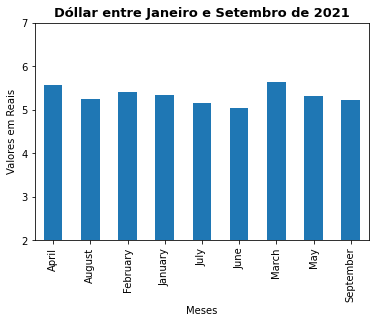

In [23]:
dados_dollar_mes.plot(kind='bar')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,2,7))
plt.style.use('ggplot')#colocando estilo GGPLOT no grafico
plt.title("Dóllar entre Janeiro e Setembro de 2021", fontsize=13, fontweight='bold', )#alternando fonte titulo
plt.xlabel("Meses")
plt.ylabel("Valores em Reais")


plt.show()

## **Agrupando e pegando a média dos valores da Bolsa de Valores por mês**

In [22]:
dados_bolsa_valores_mes = dados_bolsa_valores_2021.groupby(dados_bolsa_valores_2021['Date'].dt.strftime('%B'))['Close'].mean()
dados_bolsa_valores_mes

Date
April        119249.450000
August       120312.636364
February     117292.823529
January      120126.210526
July         126030.952381
June         128989.952381
March        113870.826087
May          122219.714286
September    114714.224888
Name: Close, dtype: float64

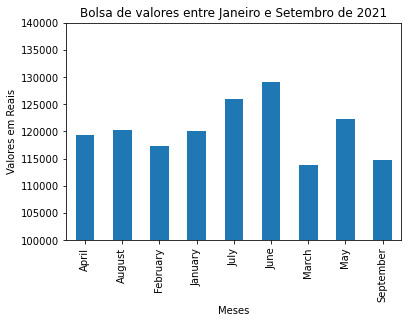

In [21]:
dados_bolsa_valores_mes.plot(kind='bar')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,100000,140000))
plt.title("Bolsa de valores entre Janeiro e Setembro de 2021")
plt.xlabel("Meses")
plt.ylabel("Valores em Reais")
plt.show()

## **Unindo os dados das tabelas**

In [20]:
dados_dollar_bolsa_valores = pd.concat([dados_bolsa_valores_mes, dados_dollar_mes], axis=1)
dados_dollar_bolsa_valores.columns = ['Bolsa de Valores', 'Dollar']
dados_dollar_bolsa_valores

,Bolsa de Valores,Dollar
Date,,
April,119249.450000,5.574136
August,120312.636364,5.252873
February,117292.823529,5.402634
January,120126.210526,5.338947
July,126030.952381,5.151366
June,128989.952381,5.035377
March,113870.826087,5.640775
May,122219.714286,5.305892
September,114714.224888,5.219927


## **Geração do Gráfico de disperção para Análise de Relação entre Ativos por mês**

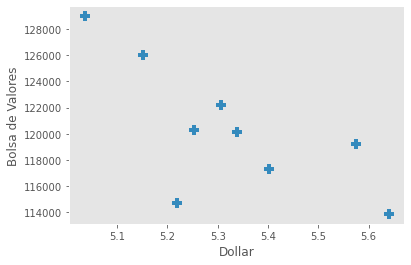

In [26]:

dados_dollar_bolsa_valores.plot(x='Dollar', y='Bolsa de Valores', kind='scatter',grid=True ,lw=10 ,marker='+') #largura dos pontos LW - marker tipo do ponto 
plt.style.use('ggplot')
plt.grid(axis='both', ls='--')
plt.show()

<AxesSubplot:>

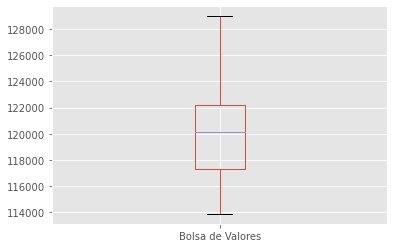

In [27]:

dados_dollar_bolsa_valores.plot.box(x='Dollar', y='Bolsa de Valores')